# Torchの練習

1 : 学習の流れ

In [1]:
import torch.nn as nn
import torch
from torch import optim
import plotly.graph_objects as go

In [2]:

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # nn.liner(入力次元, 出力次元)
        self.linl = nn.Linear(in_features=10, out_features=10,bias=False)
    
    def forward(self,x):
        x = self.linl(x)
        return x
    
def main(opt_conf = ""):
    loss_list = []
    x = torch.randn(1,10)
    w = torch.randn(1,1)
    y = torch.mul(w,x) + 2
    net = Net()
    criterion = nn.L1Loss()
    # criterion = nn.MSELoss()
    # 最適化関数
    if opt_conf == "sgd":
        optimizer = optim.SGD(net.parameters(), lr=0.1)
    elif opt_conf == "momentum_sgd":
        optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
    elif opt_conf == "adadelta":
        optimizer = optim.Adadelta(net.parameters(), rho=0.95, eps=1e-04)
    elif opt_conf == "adagrad":
        optimizer = optim.Adagrad(net.parameters())
    elif opt_conf == "adam":
        optimizer = optim.Adam(net.parameters(), lr=1e-1, betas=(0.9, 0.99), eps=1e-09)
    elif opt_conf == "rmsprop":
        optimizer = optim.RMSprop(net.parameters())

    # 学習
    for epoch in range(20):
        optimizer.zero_grad()
        
        y_pred = net(x)
        
        loss = criterion(y_pred, y)
        loss.backward()
        
        optimizer.step()
        
        loss_list.append(loss.data.item())

    return loss_list

In [3]:
def arrange_fig(fig: go.Figure):
    # Configure the graph's title and axis labels
    fig.update_layout(
        height=600,
        width=800,
        template="plotly_white",
        title_font=dict(size=32),
        xaxis_title_font=dict(family="Times New Roman", size=32, color="black"),
        yaxis_title_font=dict(family="Times New Roman", size=32, color="black"),
        xaxis=dict(
            tickfont=dict(family="Times New Roman", size=22, color="black"),
            title_standoff=10,
            ticklen=10,  # 目盛線の長さ
            tickwidth=2,  # 目盛線の太さ
            tickcolor="black",  # 目盛線の色
            ticks="outside",  # 内側に目盛線を表示
        ),
        yaxis=dict(
            tickfont=dict(family="Times New Roman", size=22, color="black"),
            title_standoff=5,
            tickangle=0,  # 角度を調整（必要であれば変更）
            automargin=True,  # 自動的にラベルの間隔を調整
            ticklen=10,  # 目盛線の長さ
            tickwidth=2,  # 目盛線の太さ
            tickcolor="black",  # 目盛線の色
            ticks="outside",  # 内側に目盛線を表示
        ),
        showlegend=True,
        legend=dict(
            x=0.95,
            y=0.6,
            xanchor="right",
            yanchor="bottom",
            font=dict(family="Times New Roman", size=20, color="black"),
        ),
        shapes=[
            dict(
                type="rect",
                xref="paper",
                yref="paper",
                x0=0,
                y0=0,
                x1=1,
                y1=1,
                line=dict(
                    color="black",
                    width=2,
                ),
                fillcolor="rgba(0,0,0,0)",
            )
        ],
        margin=dict(l=100, r=100, b=100, t=100),
    )
    fig.update_xaxes(showgrid=False, zeroline=False)
    fig.update_yaxes(showgrid=False, zeroline=False)
    return fig

In [4]:
import plotly.graph_objects as go

def plot_loss_comparison(losss_dict):
    fig = go.Figure()

    # 各最適化手法の損失をプロット
    for key, loss_values in losss_dict.items():
        fig.add_trace(go.Scatter(y=loss_values, mode='lines', name=key))

    # レイアウト設定
    fig.update_layout(
        title="Loss Comparison for Different Optimizers",
        xaxis_title="Epochs",
        yaxis_title="Loss",
        xaxis=dict(showgrid=True),
        yaxis=dict(showgrid=True),
        template="plotly_white"
    )

    # arrange_fig を適用（定義されている場合）
    if "arrange_fig" in globals():
        fig = arrange_fig(fig)

    return fig

# lossの比較

# 最適化関数の結果を格納する辞書
losss_dict = {
    "sgd": [],
    "momentum_sgd": [],
    "adadelta": [],
    "adam": [],
    "rmsprop": []
}

# 各最適化手法の損失を計算
for key in losss_dict.keys():
    losss_dict[key] = main(key)

# 関数を使ってグラフを作成
fig = plot_loss_comparison(losss_dict)

# グラフを表示
fig.show()


# 基本的なニューラルネットワーク作成

100.0%


Epoch [1/50], Loss: 0.0299, val_loss: 0.0280, val_acc: 0.3572
Epoch [2/50], Loss: 0.0273, val_loss: 0.0264, val_acc: 0.3955
Epoch [3/50], Loss: 0.0262, val_loss: 0.0248, val_acc: 0.4351
Epoch [4/50], Loss: 0.0256, val_loss: 0.0253, val_acc: 0.4119
Epoch [5/50], Loss: 0.0251, val_loss: 0.0239, val_acc: 0.4608
Epoch [6/50], Loss: 0.0247, val_loss: 0.0237, val_acc: 0.4599
Epoch [7/50], Loss: 0.0242, val_loss: 0.0238, val_acc: 0.4530
Epoch [8/50], Loss: 0.0238, val_loss: 0.0233, val_acc: 0.4741
Epoch [9/50], Loss: 0.0236, val_loss: 0.0232, val_acc: 0.4763
Epoch [10/50], Loss: 0.0234, val_loss: 0.0228, val_acc: 0.4732
Epoch [11/50], Loss: 0.0231, val_loss: 0.0221, val_acc: 0.4944
Epoch [12/50], Loss: 0.0227, val_loss: 0.0225, val_acc: 0.4920
Epoch [13/50], Loss: 0.0225, val_loss: 0.0227, val_acc: 0.4789
Epoch [14/50], Loss: 0.0223, val_loss: 0.0222, val_acc: 0.4897
Epoch [15/50], Loss: 0.0221, val_loss: 0.0216, val_acc: 0.5135
Epoch [16/50], Loss: 0.0220, val_loss: 0.0216, val_acc: 0.5118
E

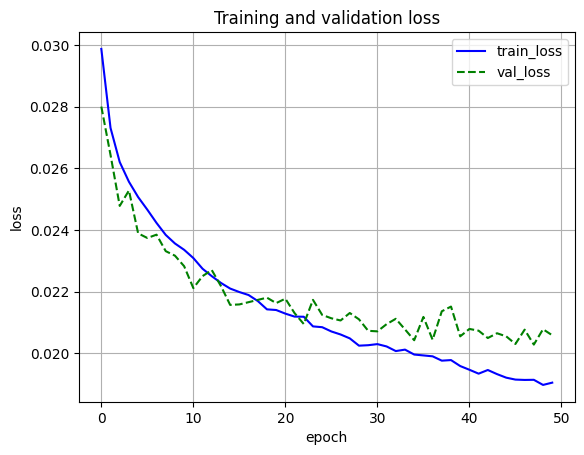

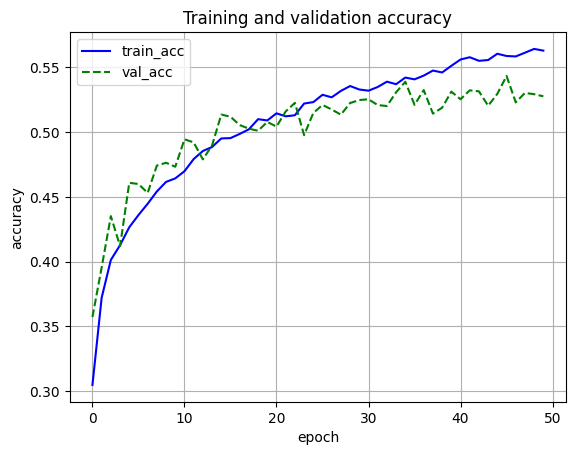

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import ssl
import certifi

ssl._create_default_https_context = lambda: ssl.create_default_context(cafile=certifi.where())

# CIFAR-10データセットのダウンロードとロード
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False, num_workers=2)

# MLPNet モデルの定義
class MLPNet(nn.Module):
    def __init__(self, num_classes=10):
        super(MLPNet, self).__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 600)
        self.fc2 = nn.Linear(600, 600)
        self.fc3 = nn.Linear(600, num_classes)
        self.dropout1 = nn.Dropout(0.2)
        self.dropout2 = nn.Dropout(0.2)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout1(x)
        x = F.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# デバイスの設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = MLPNet().to(device)

# 損失関数と最適化関数の設定
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

# 訓練の実行
num_epochs = 50
train_loss_list, train_acc_list, val_loss_list, val_acc_list = [], [], [], []

for epoch in range(num_epochs):
    net.train()
    train_loss, train_acc = 0, 0
    
    for images, labels in train_loader:
        images = images.view(-1, 32*32*3).to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        train_acc += (outputs.max(1)[1] == labels).sum().item()
    
    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_acc / len(train_loader.dataset)
    
    # 検証フェーズ
    net.eval()
    val_loss, val_acc = 0, 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.view(-1, 32*32*3).to(device)
            labels = labels.to(device)
            outputs = net(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            val_acc += (outputs.max(1)[1] == labels).sum().item()
    
    avg_val_loss = val_loss / len(test_loader.dataset)
    avg_val_acc = val_acc / len(test_loader.dataset)
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_train_loss:.4f}, val_loss: {avg_val_loss:.4f}, val_acc: {avg_val_acc:.4f}")
    
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)

# 結果のプロット
plt.figure()
plt.plot(range(num_epochs), train_loss_list, label='train_loss', color='blue', linestyle='-')
plt.plot(range(num_epochs), val_loss_list, label='val_loss', color='green', linestyle='--')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.grid()
plt.show()

plt.figure()
plt.plot(range(num_epochs), train_acc_list, label='train_acc', color='blue', linestyle='-')
plt.plot(range(num_epochs), val_acc_list, label='val_acc', color='green', linestyle='--')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Training and validation accuracy')
plt.grid()
plt.show()
